In [4]:
# استيراد المكتبات اللازمة للعمل مع البيانات وتحليلها

import pandas as pd  # مكتبة لتحليل البيانات ومعالجتها بسهولة
import matplotlib.pyplot as plt  # مكتبة لرسم المخططات البيانية
import seaborn as sns  # مكتبة لرسم المخططات الإحصائية بطريقة جذابة
import mysql.connector  # مكتبة للتعامل مع قواعد بيانات MySQL

In [5]:
# تعريف دالة لإنشاء اتصال بقاعدة البيانات
def make_connection_with_db():
    # إنشاء اتصال بقاعدة البيانات باستخدام mysql.connector
    connection_mydb = mysql.connector.connect(
        host='localhost',    # اسم المضيف (السيرفر) حيث توجد قاعدة البيانات
        user='root',         # اسم المستخدم لقاعدة البيانات
        password='',         # كلمة المرور (في هذه الحالة، لا توجد كلمة مرور)
        database='wp-ecommerce'  # اسم قاعدة البيانات التي سيتم الاتصال بها
    )
    
    # إنشاء كائن المؤشر لتنفيذ الاستعلامات على قاعدة البيانات
    # تم تعيين dictionary=True ليكون الإخراج على شكل قاموس بدلاً من قائمة
    cursor = connection_mydb.cursor(dictionary=True)
    
    # إرجاع كلاً من الاتصال وكائن المؤشر
    return connection_mydb, cursor

In [33]:
def get_users_profiles():
    """
    استرجاع بيانات المستخدمين من قاعدة البيانات، بما في ذلك معرف المستخدم، الدولة، العمر، والجنس.
    """
    
    # إنشاء DataFrame لتخزين البيانات
    df = pd.DataFrame(columns=['user_id', 'country', 'age', 'gender'])

    # إنشاء الاتصال بقاعدة البيانات واسترجاع الكائنات المطلوبة
    _, cursor = make_connection_with_db()

    # جلب جميع معرفات المستخدمين من جدول wp_users
    sql = '''SELECT ID FROM `wp_users` WHERE 1'''
    cursor.execute(sql)
    users_results = cursor.fetchall()

    # التكرار عبر المستخدمين لجلب البيانات الإضافية
    for user in users_results:
        user_id = user['ID']

        # جلب الدولة للمستخدم
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='country'"
        param = (user_id, )
        cursor.execute(sql, param)
        result = cursor.fetchall()
        country = result[0]['meta_value'] if result and len(result) > 0 else "Unknown"

        # جلب العمر للمستخدم
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='age'"
        param = (user_id, )
        cursor.execute(sql, param)
        result = cursor.fetchall()
        age = result[0]['meta_value'] if result and len(result) > 0 else "Unknown"

        # جلب الجنس للمستخدم
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='gender'"
        param = (user_id, )
        cursor.execute(sql, param)
        result = cursor.fetchall()
        gender = result[0]['meta_value'] if result and len(result) > 0 else "Unknown"

        # إنشاء كائن يحتوي على بيانات المستخدم
        obj = {
            'user_id': [user['ID']],
            'country': [country],
            'age': [age],
            'gender': [gender]
        }

        # تحويل البيانات إلى DataFrame ودمجها مع البيانات الأصلية
        df_obj = pd.DataFrame(obj)
        df = pd.concat([df, df_obj], ignore_index=True)

    # إزالة الصفوف التي تحتوي على بيانات غير معروفة
    df.drop(df[df['country'] == 'Unknown'].index, inplace=True)
    df.drop(df[df['age'] == 'Unknown'].index, inplace=True)
    df.drop(df[df['gender'] == 'Unknown'].index, inplace=True)

    # تحويل عمود العمر إلى نوع رقمي
    df['age'] = pd.to_numeric(df['age'])

    return df

In [35]:
df_profile = get_users_profiles()
df_profile # show data frame

,user_id,country,age,gender
0,1501,JO,33,ذكر
1,1784,JO,30,ذكر
2,1109,AE,37,انثى
3,112,BH,55,انثى
4,1115,JO,29,ذكر
...,...,...,...,...
1497,892,AE,30,انثى
1498,91,SA,41,ذكر
1499,910,BH,44,انثى
1500,931,SA,48,انثى


In [38]:
def show_users_age_hist():
   
    #عرض مخطط بياني (Histogram) يوضح توزيع أعمار المستخدمين.
    

    # جلب بيانات المستخدمين من قاعدة البيانات
    df_profile = get_users_profiles()

    # استخراج عمود الأعمار
    user_age = df_profile['age']

    # إنشاء المخطط باستخدام عدد معين من الفئات العمرية
    user_age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 80])

    # تسمية المحاور والعنوان
    plt.xlabel('Age')  # المحور السيني يمثل العمر
    plt.ylabel('Count')  # المحور الصادي يمثل عدد المستخدمين
    plt.title('Users Age Histogram')  # عنوان المخطط

    # عرض المخطط
    plt.show()

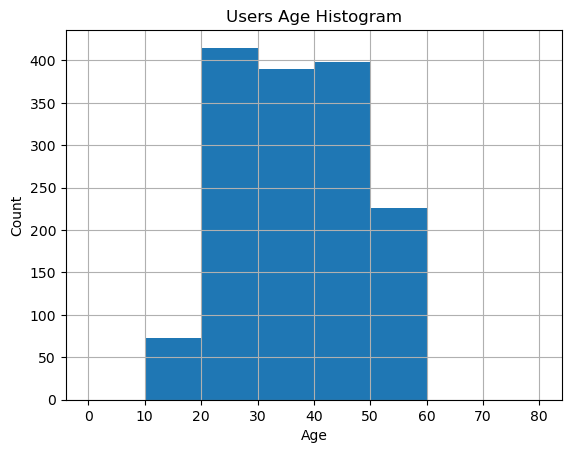

In [39]:
show_users_age_hist()

In [40]:
def show_users_age_density():

    # جلب بيانات المستخدمين من قاعدة البيانات
    df_profile = get_users_profiles()

    # استخراج عمود الأعمار
    df_age = df_profile['age']

    # إنشاء المخطط البياني للكثافة
    df_age.plot(kind='density')

    # تسمية المحاور والعنوان
    plt.xlabel("Age")  # المحور السيني يمثل العمر
    plt.ylabel("Density")  # المحور الصادي يمثل الكثافة
    plt.title("Users Age Density")  # عنوان المخطط

    # عرض المخطط
    plt.show()

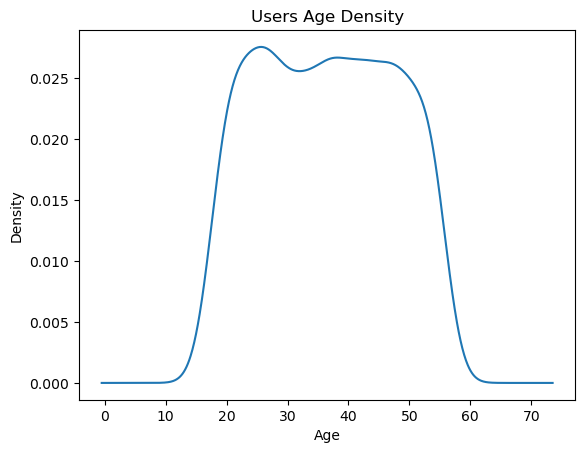

In [41]:
show_users_age_density()

In [43]:
pip install arabic-reshaper

  Using cached arabic_reshaper-3.0.0-py3-none-any.whl.metadata (12 kB)
Using cached arabic_reshaper-3.0.0-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install python-bidi

In [53]:
def show_users_gender_pie():

    # جلب بيانات المستخدمين من قاعدة البيانات
    df_profile = get_users_profiles()

    # حساب عدد المستخدمين لكل جنس
    df_gender = df_profile[['gender', 'user_id']].groupby('gender').count()

    # استيراد مكتبات معالجة اللغة العربية لتنسيق النصوص العربية بشكل صحيح
    import arabic_reshaper
    from bidi.algorithm import get_display

    # إعادة تعيين الفهرس لسهولة التعامل مع البيانات
    df_gender = df_gender.reset_index()
    print(df_gender)  # طباعة البيانات للتحقق منها

    # إعادة تشكيل النصوص العربية لضمان عرضها بشكل صحيح
    df_gender['gender'] = df_gender['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))

    # رسم المخطط الدائري
    plt.pie(df_gender['user_id'], labels=df_gender['gender'], autopct='%1.1f%%')

    # إضافة عنوان للمخطط
    plt.title('Gender Pie')

    # عرض المخطط
    plt.show()

  gender  user_id
0   انثى      784
1    ذكر      718


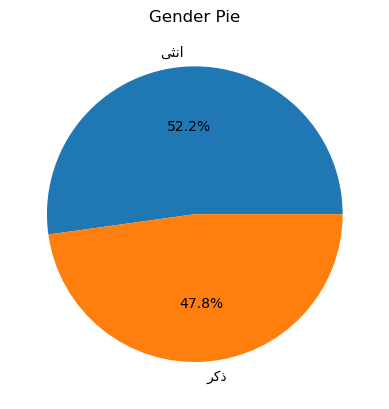

In [54]:
show_users_gender_pie()

In [55]:
def show_users_gender_countplot():

    # استيراد مكتبات معالجة اللغة العربية لضمان عرض النصوص بشكل صحيح
    import arabic_reshaper
    from bidi.algorithm import get_display

    # جلب بيانات المستخدمين من قاعدة البيانات
    df_profile = get_users_profiles()

    # تحديد حجم المخطط
    plt.subplots(figsize=(8, 6))

    # تعيين عنوان المخطط
    plt.title("Users Gender Count")

    # إعادة تشكيل النصوص العربية لضمان عرضها بشكل صحيح
    df_profile['gender'] = df_profile['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))

    # إنشاء مخطط عمودي لحساب عدد المستخدمين حسب الجنس
    ax = sns.countplot(x=df_profile['gender'])

    # إضافة التسميات فوق الأعمدة لعرض الأرقام
    ax.bar_label(ax.containers[0])

    # عرض المخطط
    plt.show()

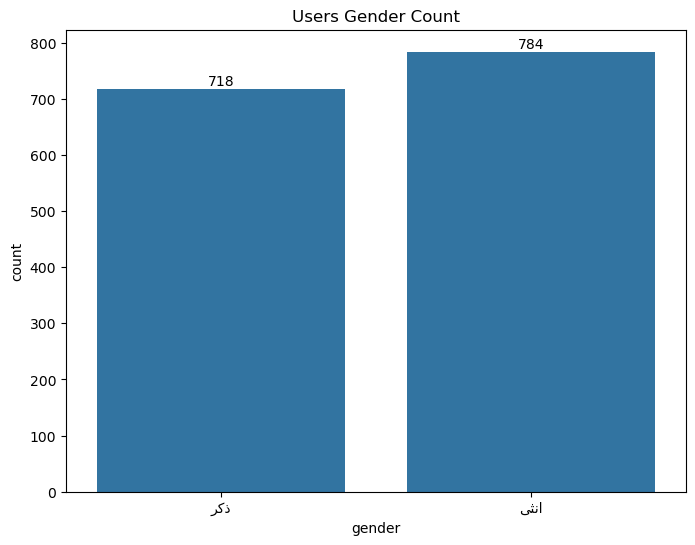

In [56]:
show_users_gender_countplot()